# Car Price Prediction

### 1) Business Problem

Car price estimation based on vehicle features.

### 2) Data Understanding

Dataset contains information of model, price, transmission, mileage, tax, mpg, fuel type, year and engine size.

**-mpg(miles per gallon) :** It indicates how far a car can go on a single gallon of fuel.

**-mileage :** It represents the distance traveled.

**-engine size :** It specifies the engine's size in litres.

Price will be our target column.

#### 2.1) Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
# warning
import warnings
warnings.filterwarnings("ignore")

#### 2.2) Reading the dataset

In [2]:
dataFrame = pd.read_csv("merc.csv")

Let's have a look at some dataset details.

In [3]:
dataFrame.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [4]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


### 3) Data Visualization & Preparation

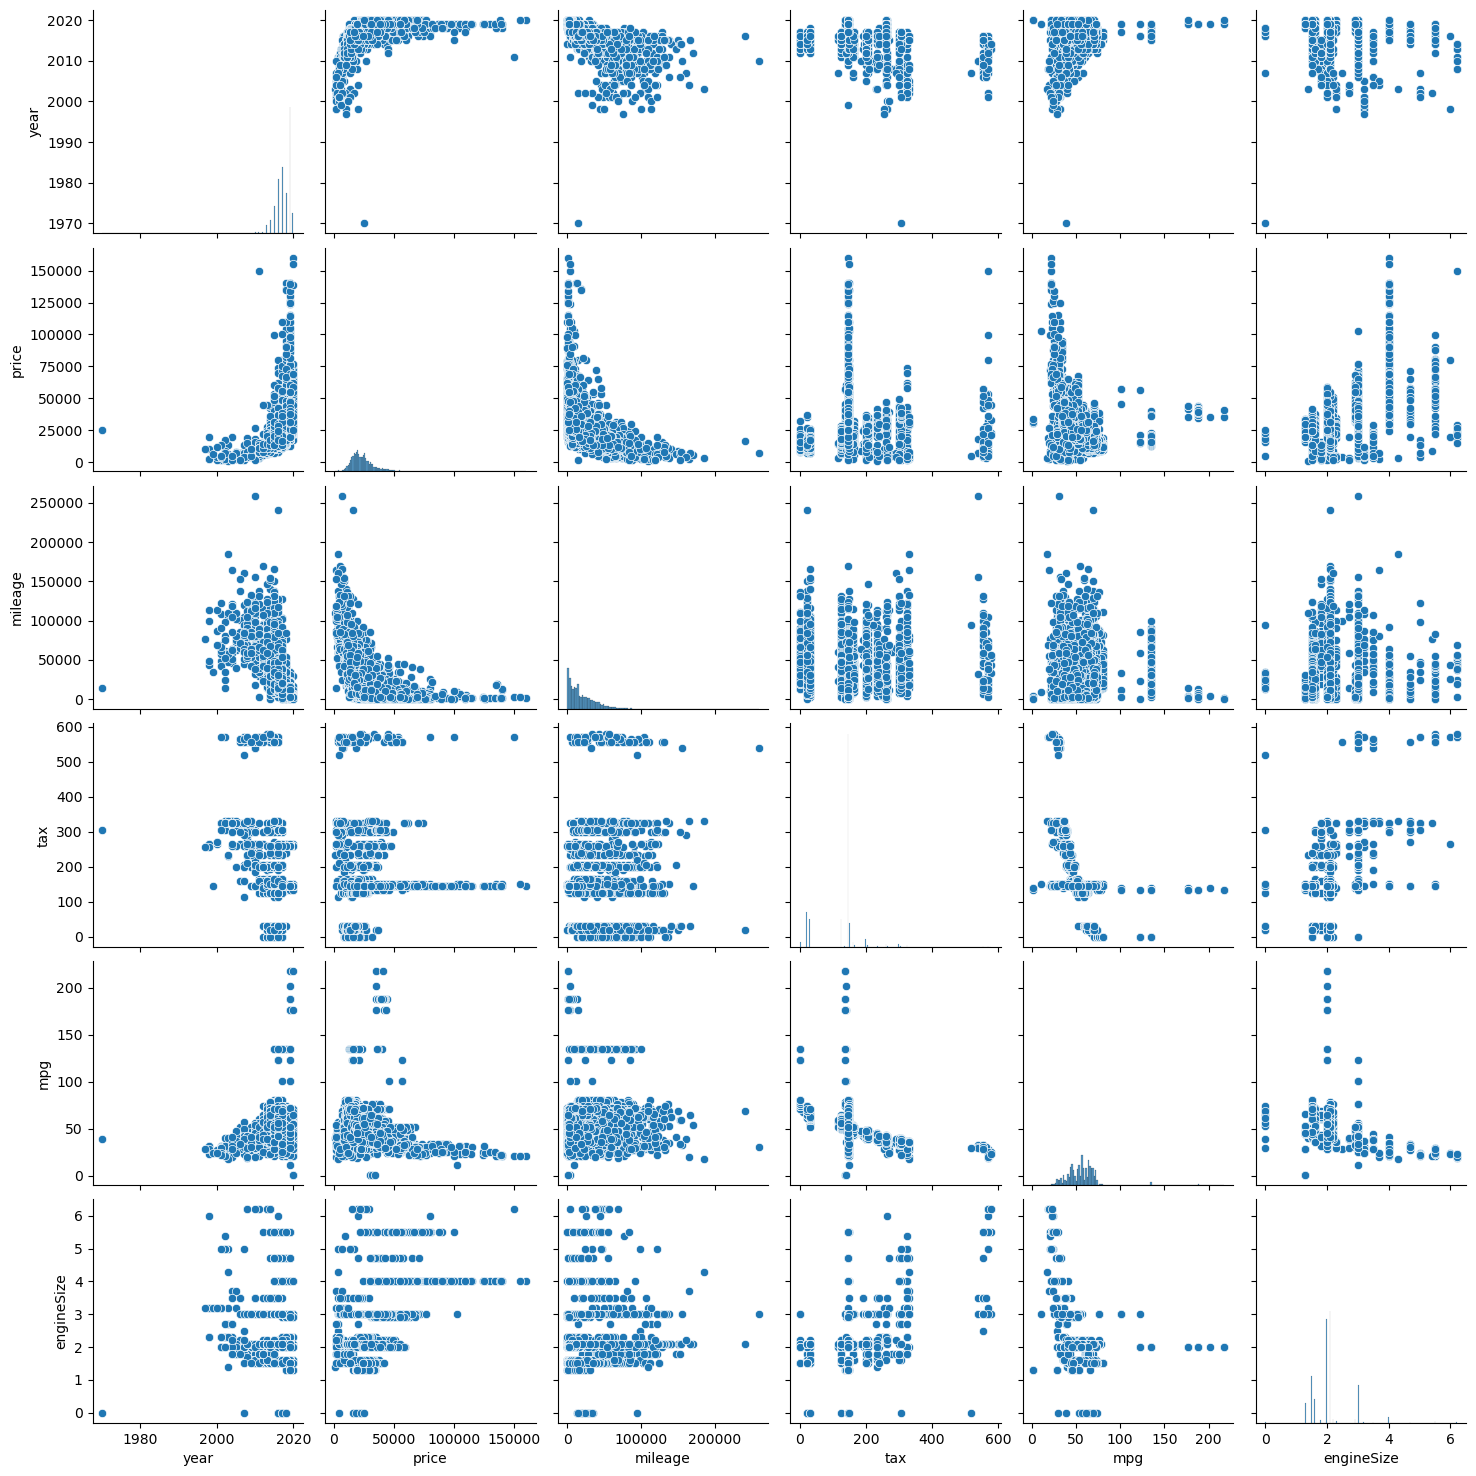

In [6]:
sbn.pairplot(dataFrame);

***Data Preprocessing***

Let's see if the data set has any missing values.

In [7]:
dataFrame.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Let's see whether there are any outlier values in the dataset using visualization techniques.

***>>>***

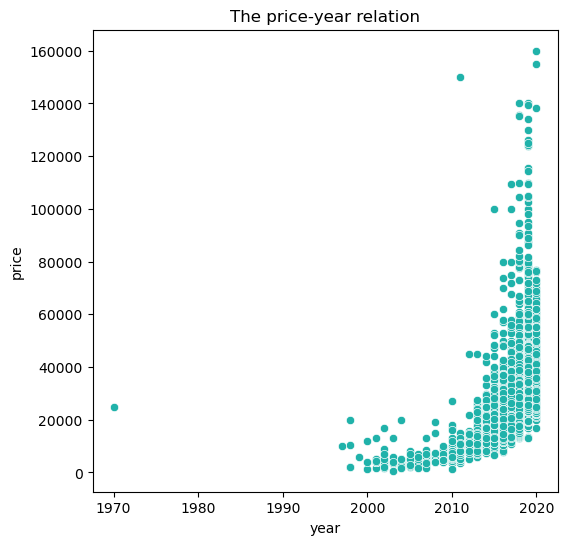

In [8]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='year',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-year relation');

Because data before to 1990 will not contribute to learning, let us clean it up.

In [9]:
dataFrame.drop(dataFrame[dataFrame.year<1990].index,inplace=True)

Let's have a look at the updated chart.

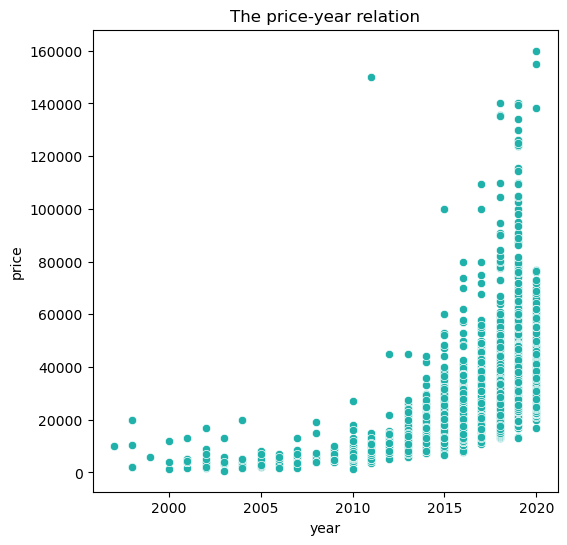

In [10]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='year',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-year relation');

***>>>***

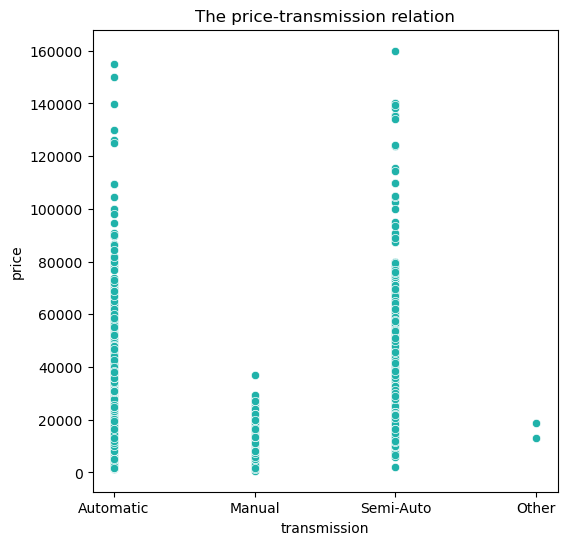

In [11]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='transmission',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-transmission relation');

Because the data in the 'other' category will not contribute to learning, let us clean it up.

In [12]:
other=dataFrame[dataFrame['transmission'].isin(['Other'])]
dataFrame=pd.concat([dataFrame,other]).drop_duplicates(keep=False)

Let's have a look at the updated chart.

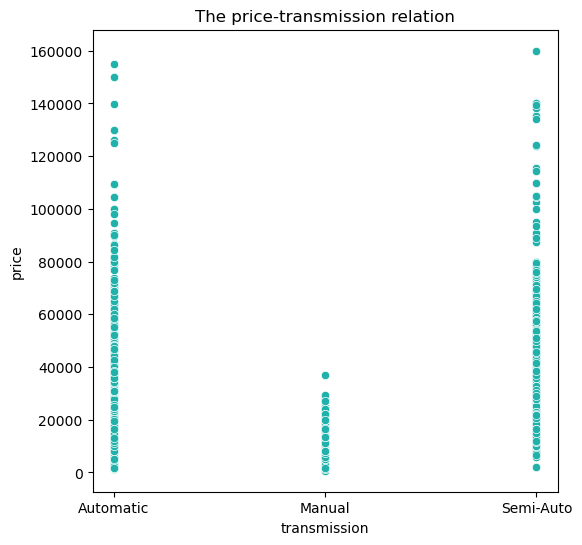

In [13]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='transmission',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-transmission relation');

***>>>***

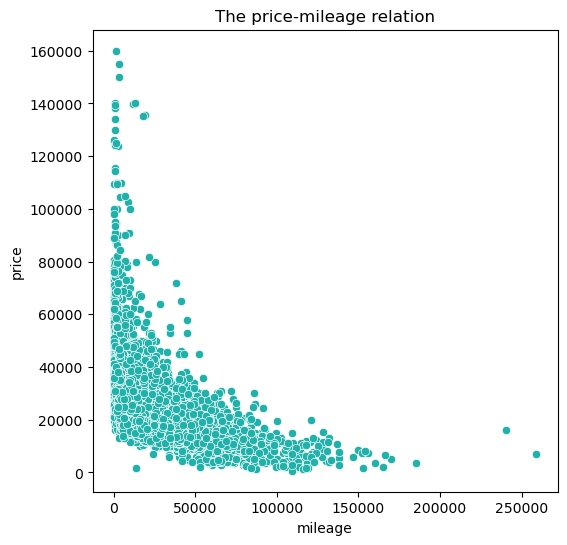

In [14]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='mileage',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-mileage relation');

***>>>***

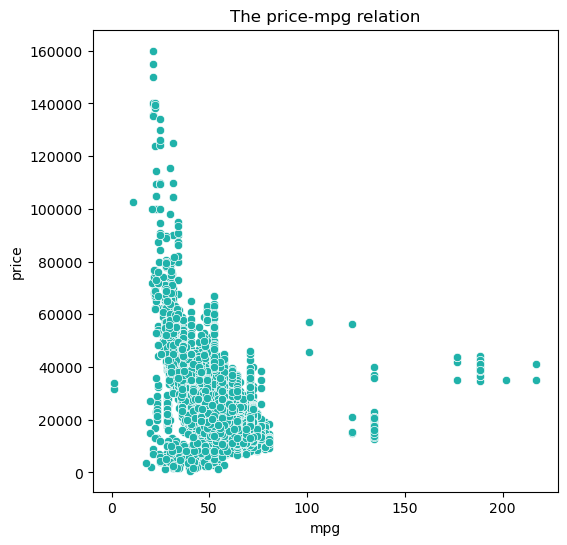

In [15]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='mpg',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-mpg relation');

Because data before to 10 will not contribute to learning, let us clean it up.

In [16]:
dataFrame=dataFrame.drop(dataFrame[dataFrame.mpg<10].index)

Let's have a look at the updated chart.

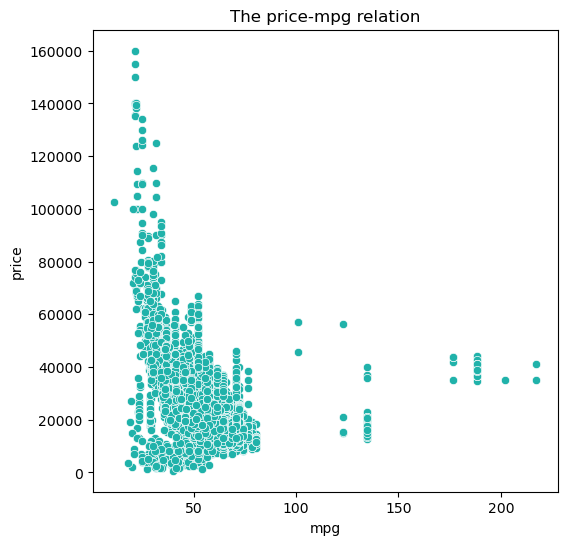

In [17]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='mpg',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-mpg relation');

***>>>***

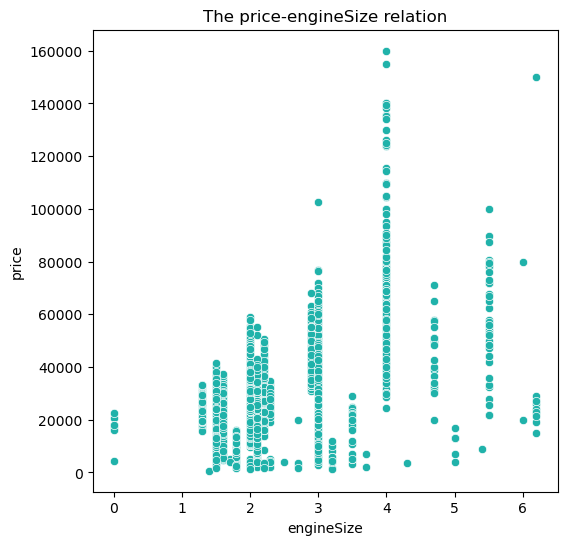

In [18]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='engineSize',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-engineSize relation');

Because the data at point 0 will not contribute to learning, let's clean it up.

In [19]:
dataFrame=dataFrame.drop(dataFrame[dataFrame.engineSize==0].index)

Let's have a look at the updated chart.

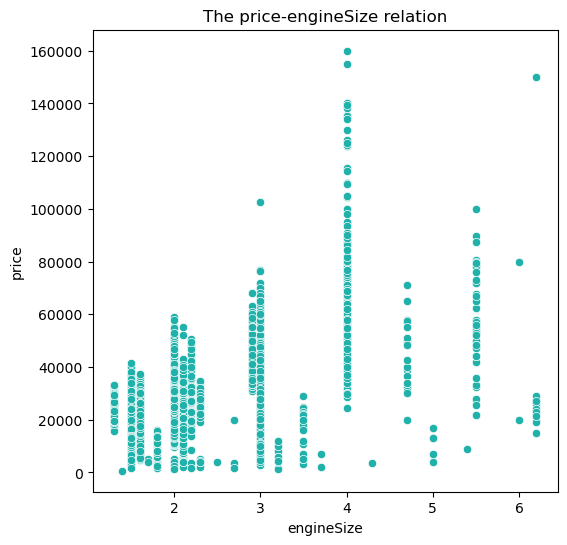

In [20]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='engineSize',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-engineSize relation');

***>>>***

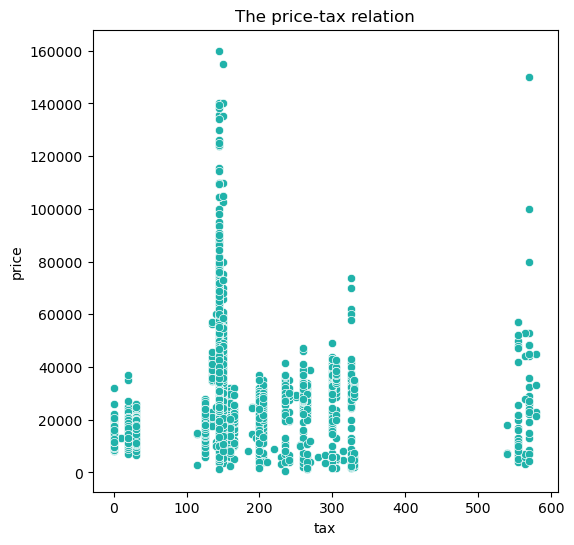

In [21]:
fig,ax=plt.subplots(figsize=(6,6))
sbn.scatterplot(x='tax',y='price',data=dataFrame,ax=ax,color='#20b2aa').set(title='The price-tax relation');

***>>>***

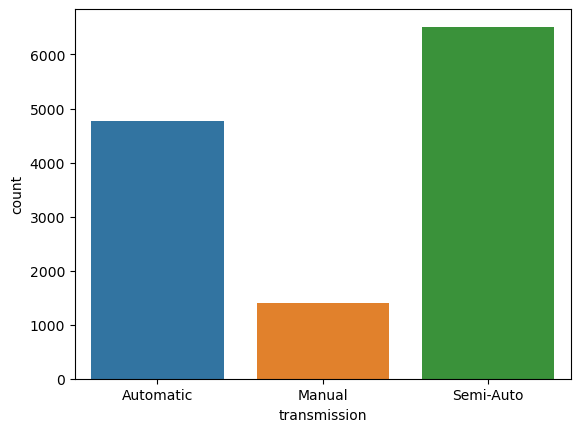

In [22]:
sbn.countplot(x=dataFrame["transmission"]);

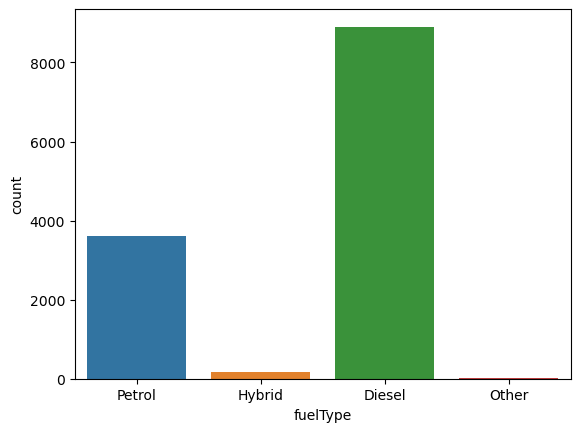

In [23]:
sbn.countplot(x=dataFrame["fuelType"]);

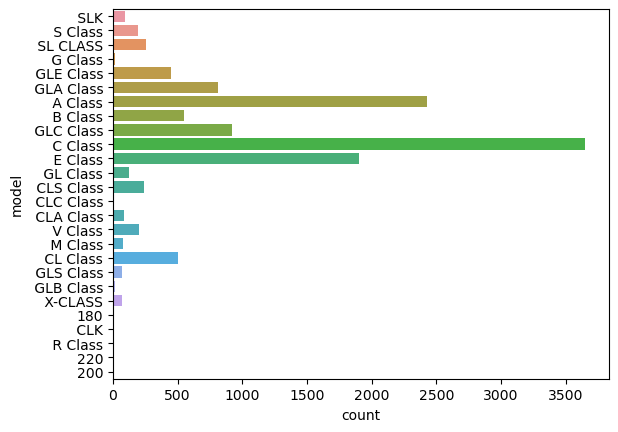

In [24]:
sbn.countplot(y=dataFrame["model"]);

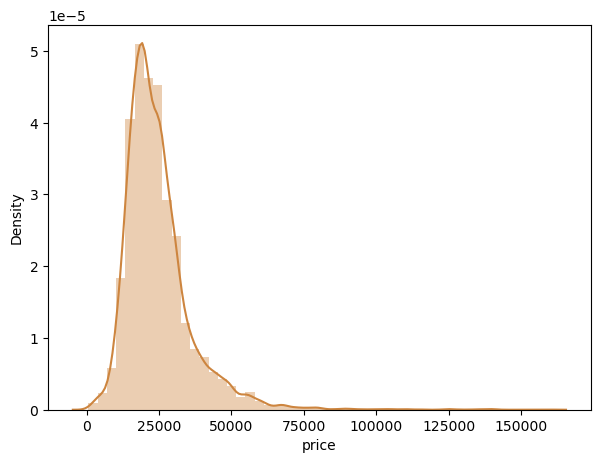

In [25]:
plt.figure(figsize=(7,5))
sbn.distplot(dataFrame["price"],color = '#cd853f');

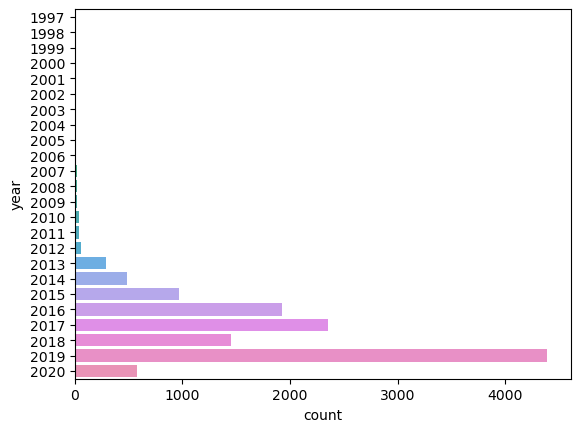

In [26]:
sbn.countplot(y=dataFrame["year"]);

As a result of my tests, I concluded that these three variables did not positively contribute to learning.

So I decided to remove all of these variables.

In [27]:
dataFrame.drop('model', axis=1,inplace=True)
dataFrame.drop('fuelType', axis=1, inplace=True)
dataFrame.drop('transmission', axis=1,inplace = True)

In [28]:
dataFrame.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.527474,-0.751510,0.007607,-0.092745,-0.146563
price,0.527474,1.000000,-0.536771,0.266133,-0.443761,0.522726
mileage,-0.751510,-0.536771,1.000000,-0.148297,0.200891,0.059951
tax,0.007607,0.266133,-0.148297,1.000000,-0.520632,0.348202
mpg,-0.092745,-0.443761,0.200891,-0.520632,1.000000,-0.350739
engineSize,-0.146563,0.522726,0.059951,0.348202,-0.350739,1.000000


In [29]:
dataFrame.corr()["price"].sort_values()

mileage      -0.536771
mpg          -0.443761
tax           0.266133
engineSize    0.522726
year          0.527474
price         1.000000
Name: price, dtype: float64

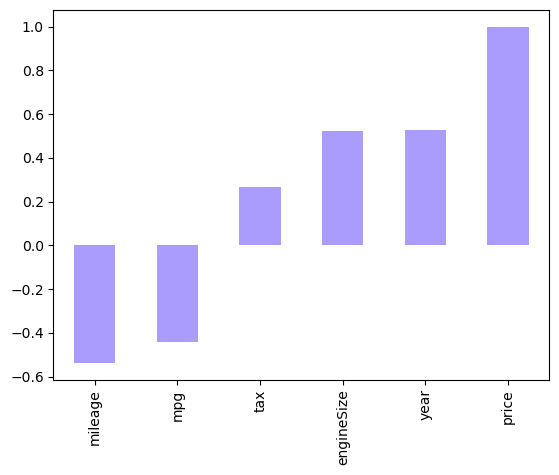

In [30]:
dataFrame.corr()["price"].sort_values().plot(kind="bar",color='#aa9cfc');

In [31]:
dataFrame.sort_values("price",ascending = False).head(20)

,year,price,mileage,tax,mpg,engineSize
6199,2020,159999,1350,145,21.4,4.0
10044,2020,154998,3000,150,21.4,4.0
5,2011,149948,3000,570,21.4,6.2
8737,2019,140319,785,150,22.1,4.0
6386,2018,139995,13046,145,21.4,4.0
8,2019,139948,12000,145,21.4,4.0
9133,2019,139559,1000,145,22.1,4.0
8821,2020,138439,1000,145,22.1,4.0
5902,2018,135771,19000,145,21.4,4.0
7864,2018,135124,18234,150,21.4,4.0


In [32]:
dataFrame.sort_values("price",ascending = True).head(20)

,year,price,mileage,tax,mpg,engineSize
11816,2003,650,109090,235,40.0,1.4
12008,2010,1350,116126,145,54.3,2.0
11765,2000,1490,87000,265,27.2,3.2
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
12710,2006,1695,153000,300,33.6,1.8
11174,2001,1695,108800,325,31.7,3.2
12766,2004,1780,118000,265,41.5,2.2
12009,2007,1800,84000,200,42.8,1.5
11764,1998,1990,99300,265,32.1,2.3


To avoid the impact of probable outliers on the dataset, let us continue with 99% of our dataset.

In [33]:
len(dataFrame)

12679

In [34]:
len(dataFrame) * 0.01

126.79

In [35]:
newDataframe = dataFrame.sort_values("price",ascending = False).iloc[131:]

In [36]:
newDataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12548.0,2017.244900,2.191487,1997.0,2016.00,2018.0,2019.00,2020.0
price,12548.0,23967.716449,9850.800679,650.0,17200.00,22000.0,28599.00,65980.0
mileage,12548.0,22434.781001,20986.254492,1.0,6915.25,15892.5,32260.75,259000.0
tax,12548.0,129.544549,65.564553,0.0,125.00,145.0,145.00,580.0
mpg,12548.0,55.496653,14.905923,17.8,45.60,56.5,64.20,217.3
engineSize,12548.0,2.057611,0.530655,1.3,1.80,2.0,2.10,6.2


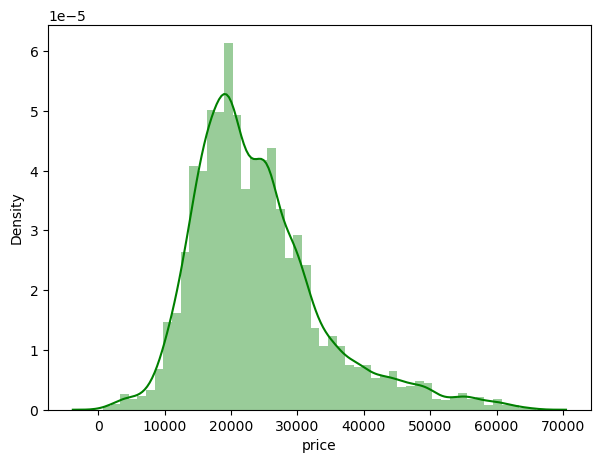

In [37]:
plt.figure(figsize=(7,5))
sbn.distplot(newDataframe["price"],color='green');

In [38]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12679.0,2017.260273,2.188201,1997.0,2016.0,2018.0,2019.0,2020.0
price,12679.0,24612.719300,11892.438299,650.0,17298.0,22250.0,28949.5,159999.0
mileage,12679.0,22242.285196,20969.821573,1.0,6622.0,15566.0,32045.0,259000.0
tax,12679.0,129.838710,65.640777,0.0,125.0,145.0,145.0,580.0
mpg,12679.0,55.206176,15.108207,11.0,45.6,56.5,64.2,217.3
engineSize,12679.0,2.078807,0.571518,1.3,1.8,2.0,2.1,6.2


As you can see, there was no change in the original dataframe.

In [39]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5166.333333
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11963.627586
2014    14081.783784
2015    16791.495366
2016    19304.061979
2017    21536.478520
2018    25773.311939
2019    31314.854798
2020    36369.711073
Name: price, dtype: float64

In [40]:
newDataframe.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5166.333333
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11963.627586
2014    14081.783784
2015    16705.868041
2016    19217.478352
2017    21376.486141
2018    24843.157453
2019    30288.722184
2020    34842.855357
Name: price, dtype: float64

'newDataframe' yielded more efficient outcomes.

In [41]:
dataFrame = newDataframe

In [42]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12548.0,2017.244900,2.191487,1997.0,2016.00,2018.0,2019.00,2020.0
price,12548.0,23967.716449,9850.800679,650.0,17200.00,22000.0,28599.00,65980.0
mileage,12548.0,22434.781001,20986.254492,1.0,6915.25,15892.5,32260.75,259000.0
tax,12548.0,129.544549,65.564553,0.0,125.00,145.0,145.00,580.0
mpg,12548.0,55.496653,14.905923,17.8,45.60,56.5,64.20,217.3
engineSize,12548.0,2.057611,0.530655,1.3,1.80,2.0,2.10,6.2


In [43]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5166.333333
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11963.627586
2014    14081.783784
2015    16705.868041
2016    19217.478352
2017    21376.486141
2018    24843.157453
2019    30288.722184
2020    34842.855357
Name: price, dtype: float64

In [44]:
dataFrame.head()

,year,price,mileage,tax,mpg,engineSize
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8083,2018,64999,41102,145,23.0,5.5
8814,2019,64999,119,145,40.9,3.0
267,2019,64998,313,145,31.4,4.7


### 4) Modelling

In [45]:
y = dataFrame["price"].values
X = dataFrame.drop("price",axis=1).values

In [46]:
X

array([[2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.01900e+03, 3.39800e+03, 1.45000e+02, 2.72000e+01, 4.00000e+00],
       [2.01800e+03, 4.11020e+04, 1.45000e+02, 2.30000e+01, 5.50000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [47]:
y

array([65980, 65000, 64999, ...,  1490,  1350,   650], dtype=int64)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

Let's see if the correct train/test split occurred.

In [49]:
len(X_train)

10038

In [50]:
len(X_test)

2510

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
X_train.shape

(10038, 5)

In [55]:
model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))


model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [56]:
model.fit(x=X_train, y = y_train,validation_data=(X_test,y_test),batch_size=250,epochs=350)

Epoch 1/350
41/41 [==============================] - 1s 5ms/step - loss: 671375680.0000 - val_loss: 671726592.0000
Epoch 2/350
41/41 [==============================] - 0s 2ms/step - loss: 671163968.0000 - val_loss: 671204992.0000
Epoch 3/350
41/41 [==============================] - 0s 2ms/step - loss: 669647744.0000 - val_loss: 667702592.0000
Epoch 4/350
41/41 [==============================] - 0s 2ms/step - loss: 660587136.0000 - val_loss: 647831168.0000
Epoch 5/350
41/41 [==============================] - 0s 2ms/step - loss: 614496512.0000 - val_loss: 557166528.0000
Epoch 6/350
41/41 [==============================] - 0s 1ms/step - loss: 451464992.0000 - val_loss: 301969600.0000
Epoch 7/350
41/41 [==============================] - 0s 2ms/step - loss: 171823568.0000 - val_loss: 84586104.0000
Epoch 8/350
41/41 [==============================] - 0s 2ms/step - loss: 85628024.0000 - val_loss: 80590432.0000
Epoch 9/350
41/41 [==============================] - 0s 2ms/step - loss: 83183672.0

Epoch 73/350
41/41 [==============================] - 0s 2ms/step - loss: 21414470.0000 - val_loss: 21116554.0000
Epoch 74/350
41/41 [==============================] - 0s 2ms/step - loss: 21313594.0000 - val_loss: 21092320.0000
Epoch 75/350
41/41 [==============================] - 0s 2ms/step - loss: 21429744.0000 - val_loss: 21111104.0000
Epoch 76/350
41/41 [==============================] - 0s 2ms/step - loss: 21208694.0000 - val_loss: 21064916.0000
Epoch 77/350
41/41 [==============================] - 0s 2ms/step - loss: 21184384.0000 - val_loss: 20892256.0000
Epoch 78/350
41/41 [==============================] - 0s 2ms/step - loss: 21116012.0000 - val_loss: 20843766.0000
Epoch 79/350
41/41 [==============================] - 0s 2ms/step - loss: 21065904.0000 - val_loss: 20796660.0000
Epoch 80/350
41/41 [==============================] - 0s 2ms/step - loss: 21030706.0000 - val_loss: 20772922.0000
Epoch 81/350
41/41 [==============================] - 0s 2ms/step - loss: 21000472.0000 

41/41 [==============================] - 0s 2ms/step - loss: 19184896.0000 - val_loss: 18806930.0000
Epoch 145/350
41/41 [==============================] - 0s 2ms/step - loss: 19102998.0000 - val_loss: 18649172.0000
Epoch 146/350
41/41 [==============================] - 0s 2ms/step - loss: 19125564.0000 - val_loss: 18699742.0000
Epoch 147/350
41/41 [==============================] - 0s 2ms/step - loss: 19148866.0000 - val_loss: 18607716.0000
Epoch 148/350
41/41 [==============================] - 0s 2ms/step - loss: 19053674.0000 - val_loss: 18602270.0000
Epoch 149/350
41/41 [==============================] - 0s 2ms/step - loss: 19103226.0000 - val_loss: 18581208.0000
Epoch 150/350
41/41 [==============================] - 0s 2ms/step - loss: 19002364.0000 - val_loss: 18743922.0000
Epoch 151/350
41/41 [==============================] - 0s 2ms/step - loss: 19061386.0000 - val_loss: 18559158.0000
Epoch 152/350
41/41 [==============================] - 0s 2ms/step - loss: 19006244.0000 - val

41/41 [==============================] - 0s 2ms/step - loss: 18322540.0000 - val_loss: 18079322.0000
Epoch 216/350
41/41 [==============================] - 0s 2ms/step - loss: 18309548.0000 - val_loss: 18228446.0000
Epoch 217/350
41/41 [==============================] - 0s 2ms/step - loss: 18417548.0000 - val_loss: 18586336.0000
Epoch 218/350
41/41 [==============================] - 0s 2ms/step - loss: 18349034.0000 - val_loss: 18432992.0000
Epoch 219/350
41/41 [==============================] - 0s 2ms/step - loss: 18434966.0000 - val_loss: 18137494.0000
Epoch 220/350
41/41 [==============================] - 0s 2ms/step - loss: 18313354.0000 - val_loss: 18166464.0000
Epoch 221/350
41/41 [==============================] - 0s 2ms/step - loss: 18394872.0000 - val_loss: 18093494.0000
Epoch 222/350
41/41 [==============================] - 0s 2ms/step - loss: 18320468.0000 - val_loss: 17934116.0000
Epoch 223/350
41/41 [==============================] - 0s 2ms/step - loss: 18282140.0000 - val

41/41 [==============================] - 0s 2ms/step - loss: 18104990.0000 - val_loss: 17698492.0000
Epoch 287/350
41/41 [==============================] - 0s 2ms/step - loss: 18057818.0000 - val_loss: 17960734.0000
Epoch 288/350
41/41 [==============================] - 0s 2ms/step - loss: 18120690.0000 - val_loss: 17721514.0000
Epoch 289/350
41/41 [==============================] - 0s 2ms/step - loss: 18094034.0000 - val_loss: 17768982.0000
Epoch 290/350
41/41 [==============================] - 0s 2ms/step - loss: 18089056.0000 - val_loss: 17741590.0000
Epoch 291/350
41/41 [==============================] - 0s 2ms/step - loss: 18144322.0000 - val_loss: 17688120.0000
Epoch 292/350
41/41 [==============================] - 0s 2ms/step - loss: 18081084.0000 - val_loss: 17660556.0000
Epoch 293/350
41/41 [==============================] - 0s 2ms/step - loss: 18072560.0000 - val_loss: 17746978.0000
Epoch 294/350
41/41 [==============================] - 0s 2ms/step - loss: 18058372.0000 - val

In [57]:
lossData = pd.DataFrame(model.history.history)

In [58]:
lossData.head()

,loss,val_loss
0,671375680.0,671726592.0
1,671163968.0,671204992.0
2,669647744.0,667702592.0
3,660587136.0,647831168.0
4,614496512.0,557166528.0


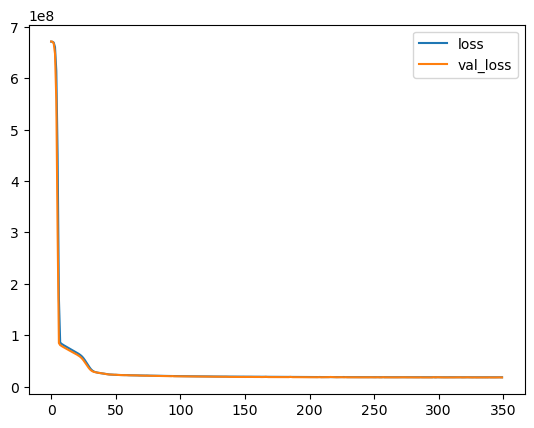

In [59]:
lossData.plot();

In [60]:
prediction = model.predict(X_test)

79/79 [==============================] - 0s 616us/step


In [61]:
prediction

array([[20897.438],
       [20458.863],
       [27894.893],
       ...,
       [31604.91 ],
       [17296.566],
       [17259.582]], dtype=float32)

In [62]:
mean_absolute_error(y_test,prediction)

3001.862957544821

In [63]:
dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12548.0,2017.244900,2.191487,1997.0,2016.00,2018.0,2019.00,2020.0
price,12548.0,23967.716449,9850.800679,650.0,17200.00,22000.0,28599.00,65980.0
mileage,12548.0,22434.781001,20986.254492,1.0,6915.25,15892.5,32260.75,259000.0
tax,12548.0,129.544549,65.564553,0.0,125.00,145.0,145.00,580.0
mpg,12548.0,55.496653,14.905923,17.8,45.60,56.5,64.20,217.3
engineSize,12548.0,2.057611,0.530655,1.3,1.80,2.0,2.10,6.2


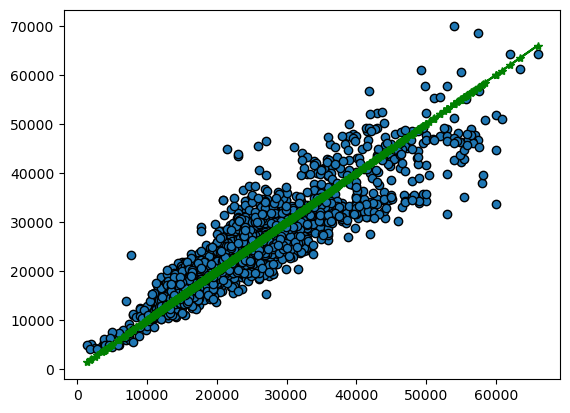

In [64]:
plt.scatter(y_test,prediction,edgecolors='black')
plt.plot(y_test,y_test,"g-*");

### 5) Evaluation

Let's evaluate our model.

In [65]:
dataFrame.iloc[2]

year           2018.0
price         64999.0
mileage       41102.0
tax             145.0
mpg              23.0
engineSize        5.5
Name: 8083, dtype: float64

Let's remove an element that we have determined from the data set.

Then let's try to forecast this element by scaling and predicting the model.

In [66]:
valueExtraction = dataFrame.drop("price",axis=1).iloc[2]

In [67]:
type(valueExtraction)

pandas.core.series.Series

In [68]:
valueExtraction = scaler.transform(valueExtraction.values.reshape(-1,5))

In [69]:
model.predict(valueExtraction)

1/1 [==============================] - 0s 15ms/step


array([[63435.57]], dtype=float32)

***As a result, price = 64999.0 is predicted to be price = 63435.57.***